In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from autoencoders import Autoencoder, TopologicalAutoencoder
from train import train_model, train_topological_model
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
from dataset import EMNISTDataset
import matplotlib.pyplot as plt
import numpy as np
import umap
from torch.utils.data import DataLoader

## Description



This performs comparison of various dimensionality reduction techniques to a topological autoencoder. This is done by using the EMNIST dataset, in particular, only the uppercase letters in the dataset.

In [2]:
# Constants
N_DIMENSIONS = 2
TRAINING_DATASET = 'data/emnist_upper_train.csv'
TEST_DATASET = 'data/emnist_upper_test.csv'
RANDOM_SUBSET_SIZE_FOR_PLOT = 500
AUTOENCODER_MODEL_PATH = 'models/autoencoder.pt'
TOP_AUTOENCODER_MODEL_PATH = 'models/top_autoencoder.pt'

In [4]:
train_dataset = EMNISTDataset(TRAINING_DATASET)
test_dataset = EMNISTDataset(TEST_DATASET)

In [8]:
test_random_indices = np.random.randint(low=0, high=len(test_dataset), size=RANDOM_SUBSET_SIZE_FOR_PLOT)


## Comparison Methods

### Principal Component Analysis

I'm using simple principal component analysis and reducing to 2 dimensions.

In [5]:
# PCA
pca_solver = PCA(n_components=N_DIMENSIONS)
pca_embeddings = pca_solver.fit_transform(test_dataset.images.numpy())
print(pca_embeddings[:5])

[[ 1.05791981 -0.62870778]
 [-1.74838784 -0.21169324]
 [-0.578252    1.75342128]
 [ 0.27886834 -2.62089034]
 [-3.39846374  1.51417608]]


## t-SNE

Experimented with the following values of perplexity

10.0 KL-Divergence: 

In [10]:


# umap_solver = umap.UMAP(n_components=N_DIMENSIONS)
# umap_embeddings = umap_solver.fit_transform(test_dataset.images.numpy())
# print("Shape: ", umap_embeddings.size)
# print(umap_embeddings[:5])

In [6]:
# t-SNE
tsne_solver = TSNE(n_components=N_DIMENSIONS, metric='euclidean', init='random', n_jobs=4)
tsne_embeddings = tsne_solver.fit_transform(test_dataset.images)
print('KL Divergence:', tsne_solver.kl_divergence_)
print(tsne_embeddings[:5])

KL Divergence: 2.3042232038954724
[[-26.17816672  18.13625071]
 [ 10.57622553 -26.16028084]
 [  8.02681697  35.90879522]
 [-11.01888873 -19.79940071]
 [ 19.48204761 -14.13861985]]


In [7]:
# Isomap

isomap_solver = Isomap(n_components=N_DIMENSIONS)
isomap_embeddings = isomap_solver.fit_transform(test_dataset.images.numpy())

## Train Traditional Autoencoder on Training Dataset

In [8]:
data_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)

In [9]:
autoencoder = Autoencoder(2)

# train_model(autoencoder, data_loader, learning_rate=0.1, epochs=200)

In [10]:
import torch

autoencoder = Autoencoder(2)
autoencoder.load_state_dict(torch.load(AUTOENCODER_MODEL_PATH))
# else:
#     torch.save(autoencoder.state_dict(), AUTOENCODER_MODEL_PATH)

<All keys matched successfully>

In [171]:
output = autoencoder(test_dataset.images.float())
output = output.detach().clamp(0,1).numpy()

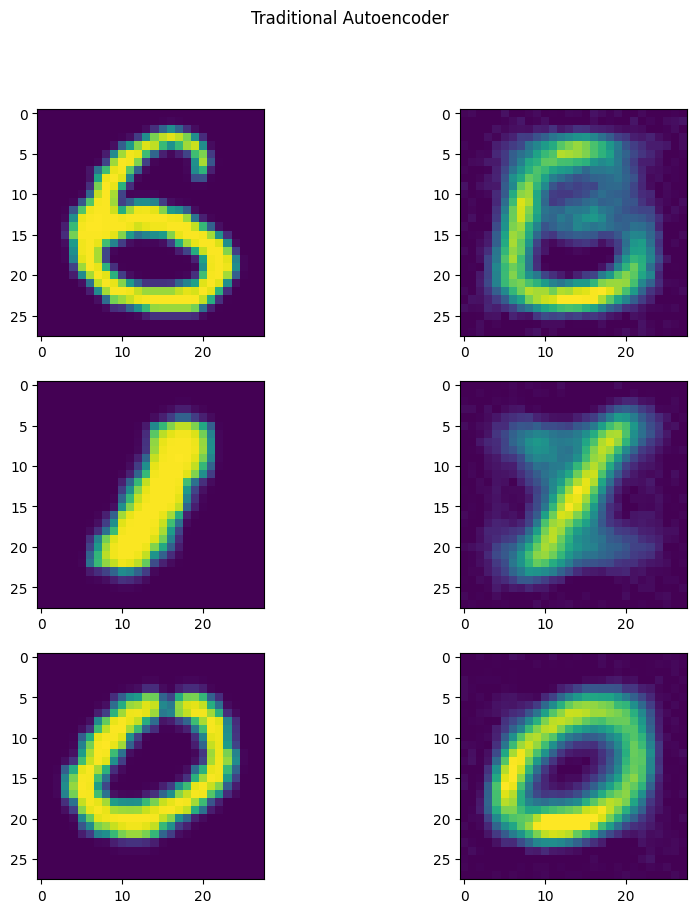

In [177]:
indices = np.random.randint(0, len(test_dataset), size=3)

samples = output[indices]
images = test_dataset.images[indices]

fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, figsize=(10,10))
fig.suptitle("Traditional Autoencoder")
count = 0
for sample, image in zip(samples, images):
    image = np.fliplr(image.numpy().reshape((28,28)))
    image = np.rot90(image)
    sample = np.fliplr(sample.reshape((28,28)))
    sample = np.rot90(sample)
    axs[count,0].imshow(image)
    axs[count,1].imshow(sample)
    count += 1



## Training Topological Autoencoder

In [12]:
from scipy.stats import loguniform, randint


In [18]:
autoencoder2 = Autoencoder(2)
tog_reg = loguniform.rvs(0.1, 3, size=1)[0]
print("Topological regularization term: ", tog_reg)
top_autoencoder = TopologicalAutoencoder(autoencoder2, top_reg=0.157165)

NameError: name 'Autoencoder' is not defined

In [266]:
batch_size = randint.rvs(16, 75, size=1)[0]
print('Batch size: ', batch_size)
data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

Batch size:  17


In [241]:
lr = loguniform.rvs(10**-4, 10**-2, size=1)[0]
print('Learning rate: ', lr)

Learning rate:  0.00010258082318685565


In [267]:
# train_topological_model(top_autoencoder, data_loader, learning_rate=0.25, epochs=100)

epoch [1/100], avg loss:0.3725
epoch [2/100], avg loss:0.3648
epoch [3/100], avg loss:0.3628
epoch [4/100], avg loss:0.3604
epoch [5/100], avg loss:0.3586
epoch [6/100], avg loss:0.3589
epoch [7/100], avg loss:0.3581
epoch [8/100], avg loss:0.3573
epoch [9/100], avg loss:0.3562
epoch [10/100], avg loss:0.3562
epoch [11/100], avg loss:0.3551
epoch [12/100], avg loss:0.3550
epoch [13/100], avg loss:0.3547
epoch [14/100], avg loss:0.3544
epoch [15/100], avg loss:0.3538
epoch [16/100], avg loss:0.3531
epoch [17/100], avg loss:0.3532
epoch [18/100], avg loss:0.3528
epoch [19/100], avg loss:0.3528
epoch [20/100], avg loss:0.3527
epoch [21/100], avg loss:0.3524
epoch [22/100], avg loss:0.3518
epoch [23/100], avg loss:0.3516
epoch [24/100], avg loss:0.3511
epoch [25/100], avg loss:0.3512
epoch [26/100], avg loss:0.3508
epoch [27/100], avg loss:0.3512
epoch [28/100], avg loss:0.3501
epoch [29/100], avg loss:0.3500
epoch [30/100], avg loss:0.3500
epoch [31/100], avg loss:0.3498
epoch [32/100], a

In [17]:
import torch

# torch.save(top_autoencoder.state_dict(), TOP_AUTOENCODER_MODEL_PATH)

top_autoencoder.load_state_dict(torch.load(TOP_AUTOENCODER_MODEL_PATH))

NameError: name 'top_autoencoder' is not defined

In [15]:
Z_top = top_autoencoder.encode(test_dataset.images.float())
output = top_autoencoder.decode(Z_top.float())
output = output.detach().clamp(0,1).numpy()

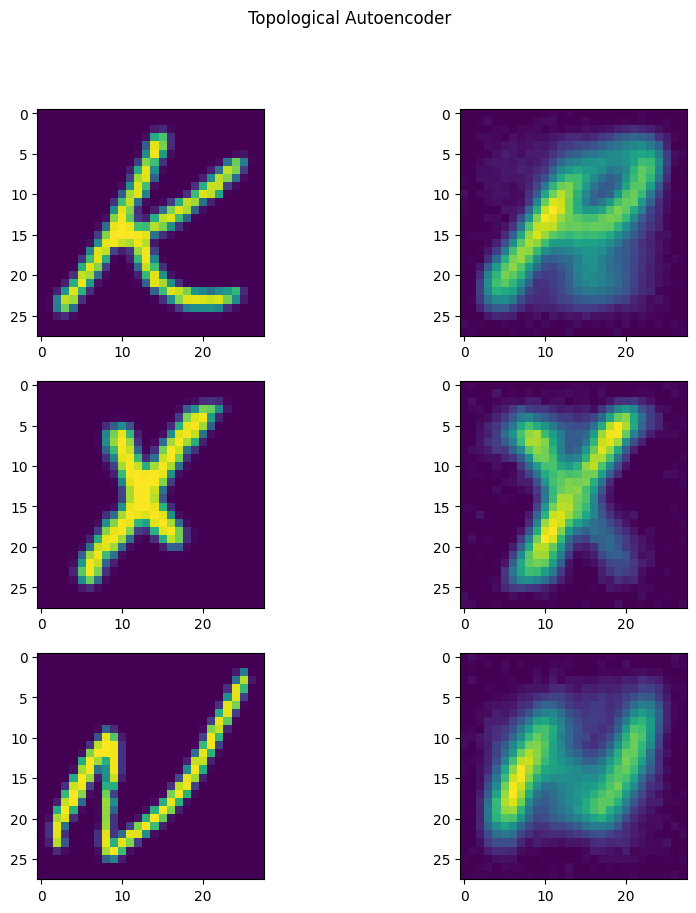

In [166]:
indices = np.random.randint(0, len(test_dataset), size=3)

samples = output[indices]
images = test_dataset.images[indices]

fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, figsize=(10,10))
fig.suptitle("Topological Autoencoder")
count = 0
for sample, image in zip(samples, images):
    image = np.fliplr(image.numpy().reshape((28,28)))
    image = np.rot90(image)
    sample = np.fliplr(sample.reshape((28,28)))
    sample = np.rot90(sample)
    axs[count,0].imshow(image)
    axs[count,1].imshow(sample)
    count += 1


In [3]:
import pandas as pd

test = pd.read_csv(TEST_DATASET, header=None)

test_labels = test.iloc[:,1]
test_images = test.iloc[:,2:]
labels = {26:1, 33:2, 14:3, 11:4, 12:5}

In [4]:
test_labels.describe()

count    10400.000000
mean        22.500000
std          7.500361
min         10.000000
25%         16.000000
50%         22.500000
75%         29.000000
max         35.000000
Name: 1, dtype: float64

In [5]:
classes = test.iloc[:,1].unique()
classes

array([26, 33, 14, 11, 12, 16, 27, 28, 29, 35, 21, 20, 23, 25, 31, 17, 34,
       18, 19, 32, 13, 24, 10, 30, 15, 22])

In [6]:
subset = []

for i in classes:
    subset.append(test[test[1] == i].sample(150))

subset = pd.concat(subset)
test_labels = subset.iloc[:,1]
test_images_subset = subset.iloc[:,2:]


In [7]:
test.head()

0    1    2    3    4    5    6    7    8    9    ...  776  777  778  779  \
0    3   26    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    5   33    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    6   14    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    7   11    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9   12    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   780  781  782  783  784  785  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 786 columns]

In [8]:
test_labels.head()

3653    26
8565    26
2605    26
4391    26
1440    26
Name: 1, dtype: int64

In [9]:
test_labels.describe()

count    3900.000000
mean       22.500000
std         7.500962
min        10.000000
25%        16.000000
50%        22.500000
75%        29.000000
max        35.000000
Name: 1, dtype: float64

In [10]:
test_images.head()

2    3    4    5    6    7    8    9    10   11   ...  776  777  778  779  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   780  781  782  783  784  785  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

In [11]:
test_images = test_images.to_numpy()
test_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
test_indices = test_labels.index
test_indices

Int64Index([3653, 8565, 2605, 4391, 1440, 8399, 1406, 7144, 2353, 3205,
            ...
            1639, 6319, 7585,  418, 5291, 3505, 9906,  990, 7313, 8157],
           dtype='int64', length=3900)

In [13]:
test_images.shape

(10400, 784)

In [14]:
test_random_indices = test_indices
test_random_indices

Int64Index([3653, 8565, 2605, 4391, 1440, 8399, 1406, 7144, 2353, 3205,
            ...
            1639, 6319, 7585,  418, 5291, 3505, 9906,  990, 7313, 8157],
           dtype='int64', length=3900)

In [15]:
test_labels[test_random_indices]

3653    26
8565    26
2605    26
4391    26
1440    26
        ..
3505    22
9906    22
990     22
7313    22
8157    22
Name: 1, Length: 3900, dtype: int64

In [16]:
Z = autoencoder.encoder(test_dataset.images.float()).detach().numpy()

NameError: name 'autoencoder' is not defined

In [41]:
Z_top = Z_top.detach().numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [63]:
test_labels.unique()

26

In [68]:
from matplotlib import colors

color_mapping = {}

low, high = 0, 10

for label in test_labels.unique():
    color_mapping[label] = np.random.randint(low, high)
    low, high = low + 30, high + 30


label_colors = []

for test_label in test_labels[test_random_indices]:
    label_colors.append(color_mapping[test_label])

set(label_colors)

{9,
 31,
 69,
 93,
 123,
 153,
 181,
 213,
 248,
 270,
 304,
 335,
 369,
 393,
 428,
 458,
 485,
 511,
 543,
 572,
 608,
 631,
 669,
 697,
 722,
 759}

Text(0.5, 0.98, 'Dimensionality Reduction of EMNIST Dataset')

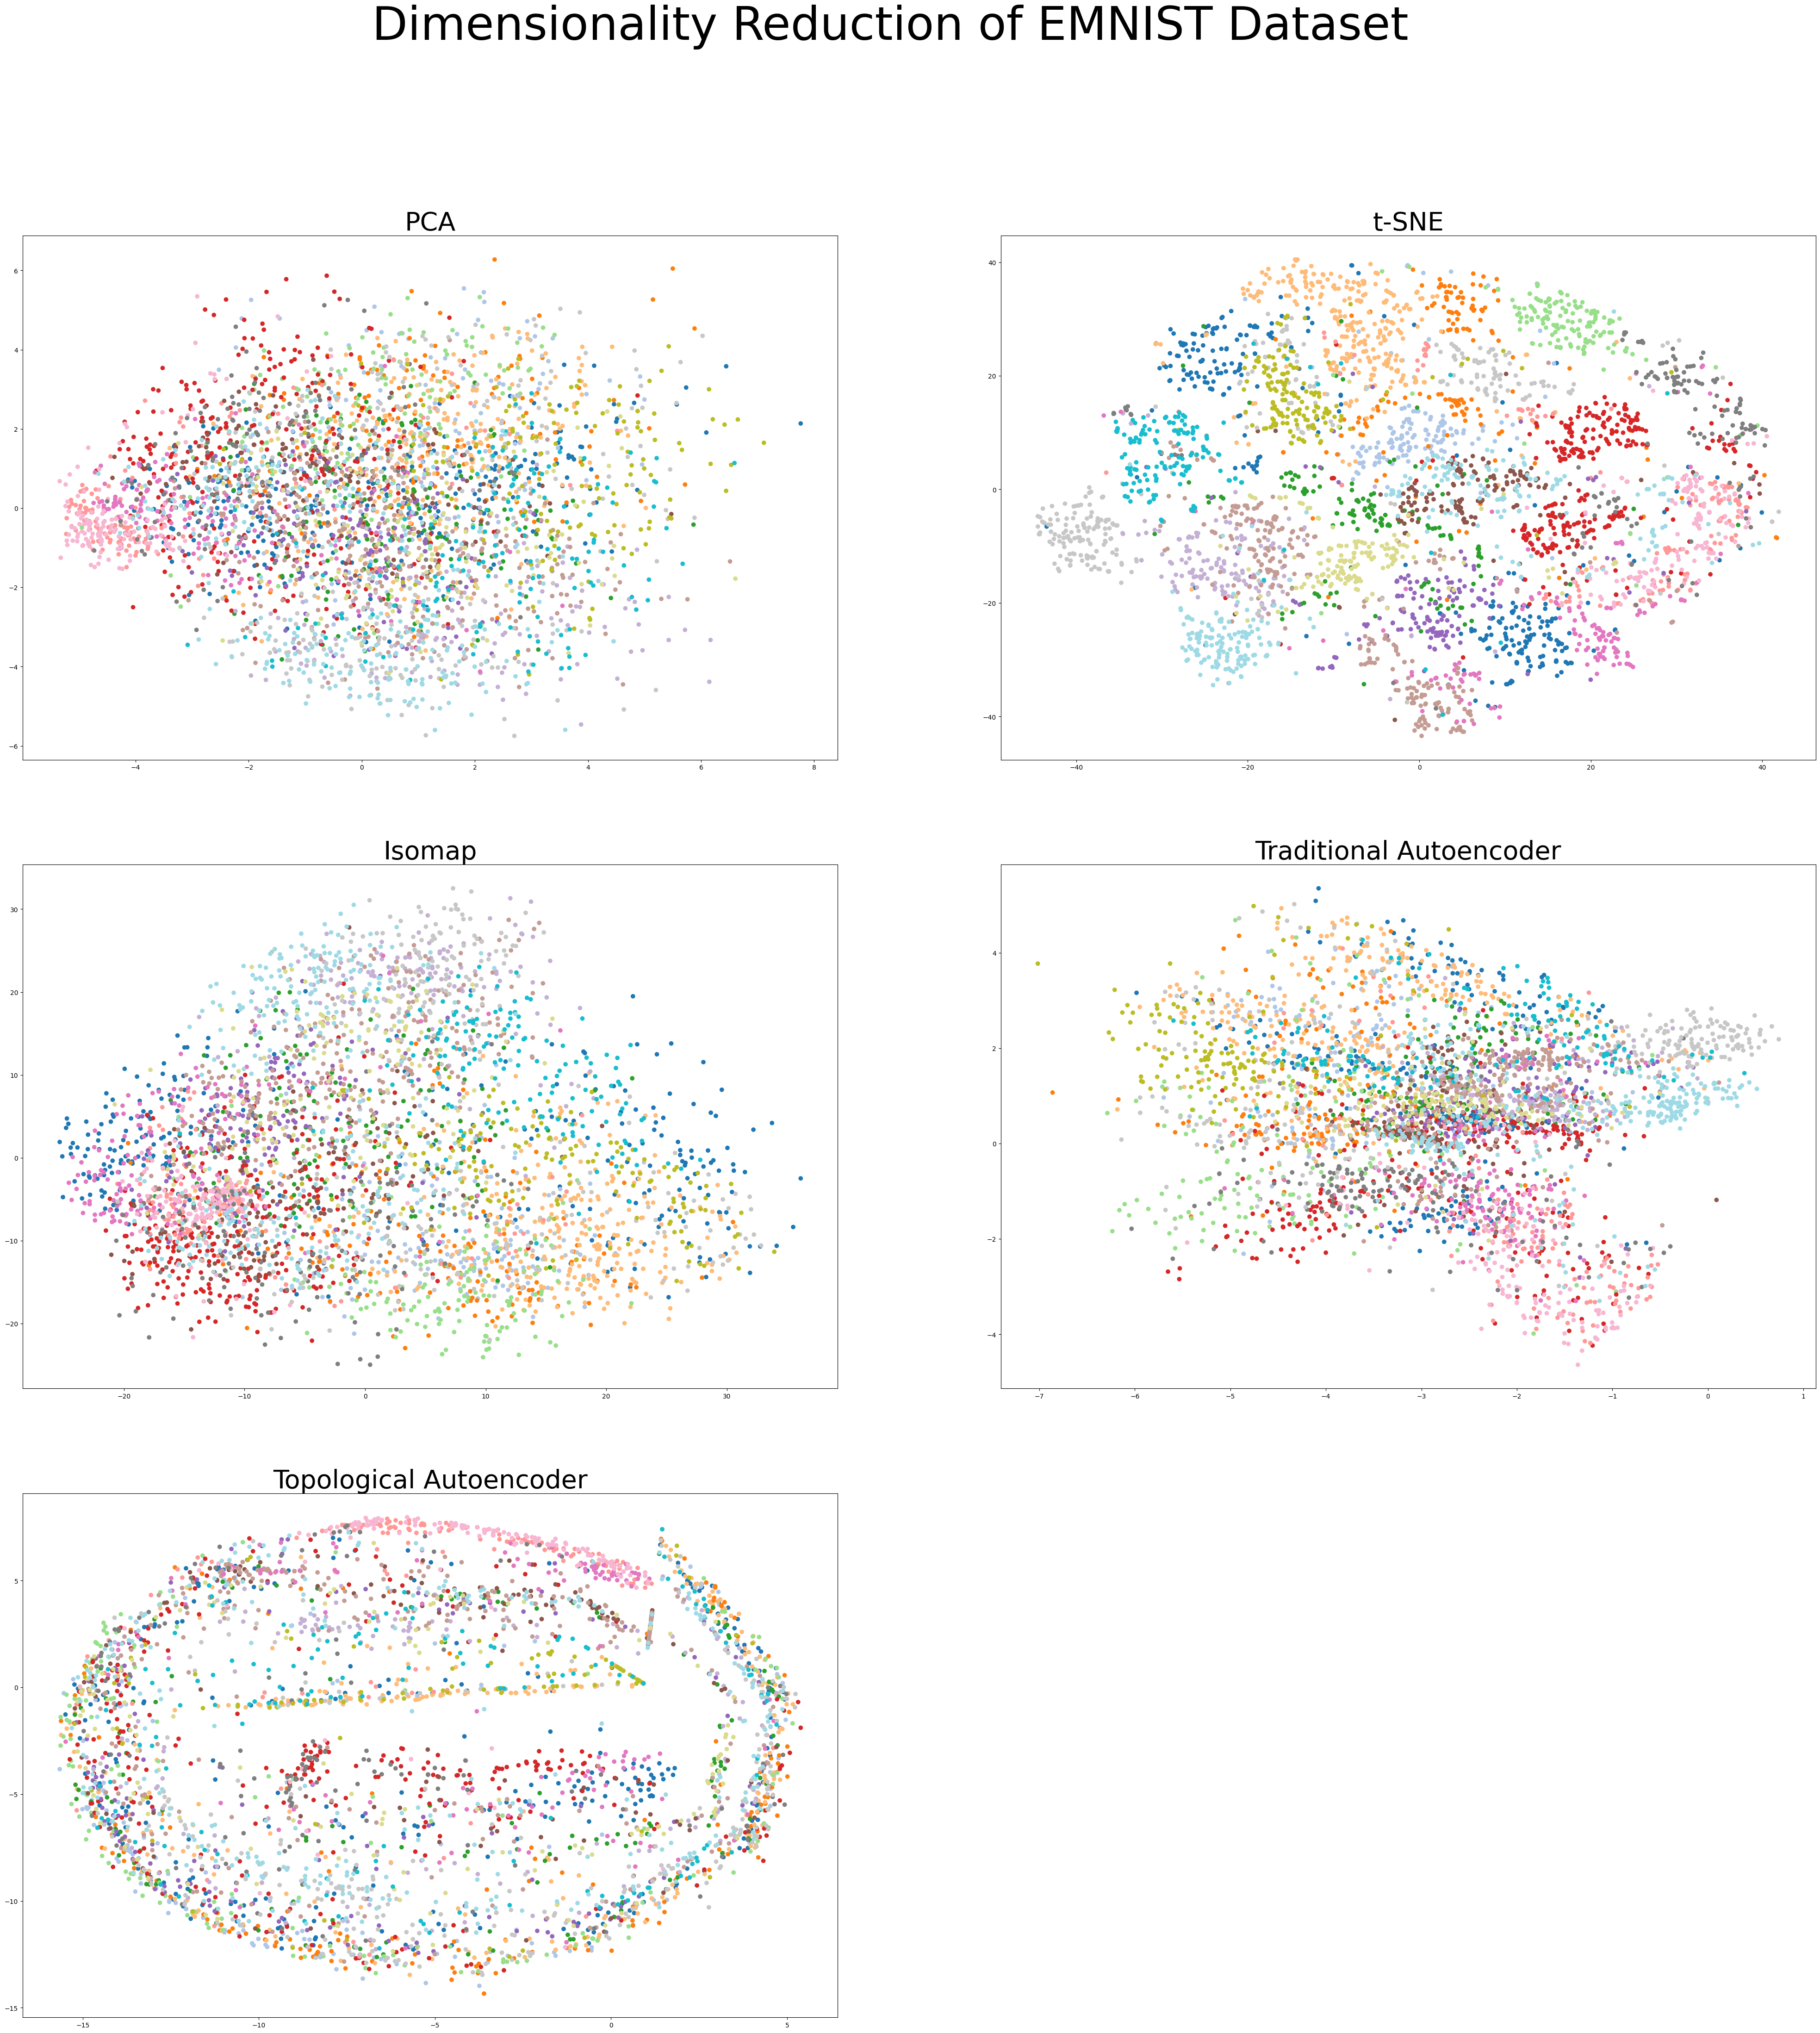

In [72]:
## Plot Embeddings in 2-Dimensional Space

fig, axes = plt.subplots(nrows=3, ncols=2, squeeze=False, figsize=(50,50))

# Principal Component Analysis Plot
axes[0,0].scatter(pca_embeddings[:,0][test_random_indices], pca_embeddings[:,1][test_random_indices], c=label_colors, cmap='tab20')
axes[0,0].set_title('PCA', fontsize=60)


# t-SNE Plot
axes[0,1].scatter(tsne_embeddings[:,0][test_random_indices], tsne_embeddings[:,1][test_random_indices], c=label_colors, cmap='tab20')
axes[0,1].set_title('t-SNE', fontsize=60)



# Isomap Plot
axes[1,0].scatter(isomap_embeddings[:,0][test_random_indices], isomap_embeddings[:,1][test_random_indices], c=label_colors, cmap='tab20')
axes[1,0].set_title('Isomap', fontsize=60)

# Traditional Autoencoder
axes[1,1].scatter(Z[:,0][test_random_indices], Z[:,1][test_random_indices], c=label_colors, cmap='tab20')
axes[1,1].set_title('Traditional Autoencoder', fontsize=60)

# Topological Autoencoder
axes[2,0].scatter(Z_top[:,0][test_random_indices], Z_top[:,1][test_random_indices], c=label_colors, cmap='tab20')
axes[2,0].set_title('Topological Autoencoder', fontsize=60)

fig.delaxes(axes[2,1])

import matplotlib.patches as mpatches

# class_colours = list(color_mapping.values())

# recs = []
# for i in range(0,len(class_colours)):
#     recs.append(mpatches.Rectangle((0,0),1,1,color=class_colours[i]))

# fig.legend(handles=recs, labels=['Q', 'X', 'E', 'B', 'C'], loc='lower right')
fig.suptitle("Dimensionality Reduction of EMNIST Dataset", fontsize=72)


In [25]:
statistics = {'method': [], 'kl-0.01': [], 'kl-0.1': [], 'kl-1': [], 'l-MRRE': [], 'l-trust': [], 'l-RMSE': [], 'l-cont': []}

In [27]:
from eval import MeasureCalculator

X = test_images

for Z, method in [(pca_embeddings, 'PCA'), (tsne_embeddings, 'TSNE'), (isomap_embeddings, 'Isomap'), (Z, 'AE'), (Z_top, 'TopoAE')]:
    k = 5
    calc = MeasureCalculator(X,Z,7)
    statistics['method'].append(method)
    statistics['kl-0.01'].append(calc.density_kl_global_001())
    print('calculated kl first')
    statistics['kl-0.1'].append(calc.density_kl_global_01())
    print('calculated kl2nd')
    statistics['kl-1'].append(calc.density_kl_global_1())
    print('calculated kl3nd')
    statistics['l-MRRE'].append(calc.mrre(k))
    print('calculated mrre')
    statistics['l-trust'].append(calc.trustworthiness(k))
    print('calculated trust')
    statistics['l-RMSE'].append(calc.rmse())
    print('calculated rmse')
    statistics['l-cont'].append(calc.continuity(k))
    print('Done with', method)

calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with PCA
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with TSNE
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with Isomap
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with AE
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with TopoAE


In [28]:
print(statistics)

{'method': ['PCA', 'TSNE', 'Isomap', 'AE', 'TopoAE'], 'kl-0.01': [0.29063686275670475, 0.18074102568751416, 0.14007415956232627, 0.29063686275670475, 0.1841749747248762], 'kl-0.1': [0.12736166238366523, 0.1223498384555419, 0.0807297228566855, 0.12736166238366523, 0.10207800242466891], 'kl-1': [0.0014269585016633175, 0.0022550791895878134, 0.0013652697182680528, 0.0014269585016633175, 0.0019061185755171323], 'l-MRRE': [(0.2825388447261931, 0.0734836714312584), (0.010053762125547077, 0.028977536566135872), (0.27285354539582934, 0.03463040759692745), (0.2825388447261931, 0.0734836714312584), (0.2429285159043754, 0.21567967364951152)], 'l-trust': [0.7189914542251437, 0.9870082737460769, 0.7260784830786996, 0.7189914542251437, 0.7566030804020845], 'l-RMSE': [2961.8568361795283, 2930.0192468537184, 2943.3758103807822, 2961.8568361795283, 2955.230591101901], 'l-cont': [0.9205116639278735, 0.9636638816101143, 0.963452317241073, 0.9205116639278735, 0.7740041988659916]}


In [29]:
df = pd.DataFrame.from_dict(statistics)
df

method   kl-0.01    kl-0.1      kl-1  \
0     PCA  0.290637  0.127362  0.001427   
1    TSNE  0.180741  0.122350  0.002255   
2  Isomap  0.140074  0.080730  0.001365   
3      AE  0.290637  0.127362  0.001427   
4  TopoAE  0.184175  0.102078  0.001906   

                                         l-MRRE   l-trust       l-RMSE  \
0      (0.2825388447261931, 0.0734836714312584)  0.718991  2961.856836   
1  (0.010053762125547077, 0.028977536566135872)  0.987008  2930.019247   
2    (0.27285354539582934, 0.03463040759692745)  0.726078  2943.375810   
3      (0.2825388447261931, 0.0734836714312584)  0.718991  2961.856836   
4     (0.2429285159043754, 0.21567967364951152)  0.756603  2955.230591   

     l-cont  
0  0.920512  
1  0.963664  
2  0.963452  
3  0.920512  
4  0.774004

In [43]:
statistics = {'method': [], 'kl-0.01': [], 'kl-0.1': [], 'kl-1': [], 'l-MRRE': [], 'l-trust': [], 'l-RMSE': [], 'l-cont': []}

In [48]:
from scipy.spatial.distance import pdist, squareform

X = test_images

for latent, method in [(pca_embeddings, 'PCA'), (tsne_embeddings, 'TSNE'), (isomap_embeddings, 'Isomap'), (Z, 'AE'), (Z_top, 'TopoAE')]:
    k = 10
    if calc == None:
        calc = MeasureCalculator(X,latent,k)
    else:
        calc.pairwise_Z = squareform(pdist(latent))
        calc.neighbors_Z, calc.ranks_Z = calc._neighbours_and_ranks(calc.pairwise_Z, k)
    statistics['method'].append(method)
    statistics['kl-0.01'].append(calc.density_kl_global_001())
    print('calculated kl first')
    statistics['kl-0.1'].append(calc.density_kl_global_01())
    print('calculated kl2nd')
    statistics['kl-1'].append(calc.density_kl_global_1())
    print('calculated kl3nd')
    statistics['l-MRRE'].append(calc.mrre(k))
    print('calculated mrre')
    statistics['l-trust'].append(calc.trustworthiness(k))
    print('calculated trust')
    statistics['l-RMSE'].append(calc.rmse())
    print('calculated rmse')
    statistics['l-cont'].append(calc.continuity(k))
    print('Done with', method)

calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with PCA
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with TSNE
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with Isomap
calculated kl first
calculated kl2nd
calculated kl3nd
calculated mrre
calculated trust
calculated rmse
Done with AE
calculated kl first
calculated kl2nd
calculated kl3nd


/Users/marcusblake/source/topological-data-analysis/topological_autoencoders/eval.py:229: RuntimeWarning: divide by zero encountered in long_scalars
  mrre_ZX += abs(rx - rz) / rz


calculated mrre
calculated trust
calculated rmse
Done with TopoAE


In [47]:
df = pd.DataFrame.from_dict(statistics)
df

method   kl-0.01    kl-0.1      kl-1  \
0     PCA  0.290637  0.127362  0.001427   
1    TSNE  0.180741  0.122350  0.002255   
2  Isomap  0.140074  0.080730  0.001365   
3      AE  0.438697  0.137311  0.001451   
4  TopoAE  0.184175  0.102078  0.001906   
5     PCA  0.290637  0.127362  0.001427   
6    TSNE  0.180741  0.122350  0.002255   
7  Isomap  0.140074  0.080730  0.001365   
8      AE  0.438697  0.137311  0.001451   
9  TopoAE  0.184175  0.102078  0.001906   

                                          l-MRRE   l-trust       l-RMSE  \
0     (0.28173745539265727, 0.08337635004096086)  0.720062  2961.856836   
1     (0.0008684658413390296, 0.040110325999386)  0.720062  2930.019247   
2   (0.002585816595360211, 0.047623259241017235)  0.720062  2943.375810   
3     (0.002128526864796144, 0.0876840647798068)  0.720062  2963.289011   
4                     (inf, 0.23197720795908264)  0.720062  2955.230591   
5      (0.2816169920291653, 0.08875602640036757)  0.720212  2961.856836   
6     (0.0012497882831106946, 0.046294006845942)  0.720212  2930.019247   
7  (0.0038630736081108953, 0.053830802788502705)  0.720212  2943.375810   
8   (0.0030930576037285166, 0.09260838934539886)  0.720212  2963.289011   
9                      (inf, 0.2405460643062792)  0.720212  2955.230591   

     l-cont  
0  0.902554  
1  0.944617  
2  0.936881  
3  0.901079  
4  0.748756  
5  0.892088  
6  0.932899  
7  0.925238  
8  0.891884  
9  0.734342